In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder

In [28]:
df = pd.read_csv('car_data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [29]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [30]:
df.duplicated().sum()

2

In [31]:
df.drop_duplicates(inplace = True)
df.shape

(299, 9)

In [32]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.566332,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Selling_type   299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


In [34]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [35]:
df['Year'].value_counts()

Year
2015    60
2016    49
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: count, dtype: int64

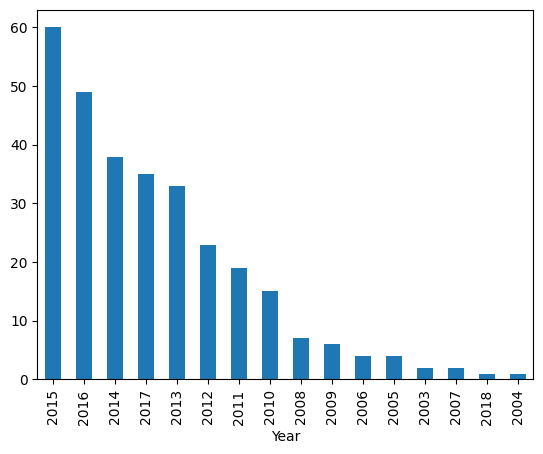

In [36]:
#cars sold in an year
df['Year'].value_counts().plot(kind = 'bar')
plt.show()

<Axes: ylabel='count'>

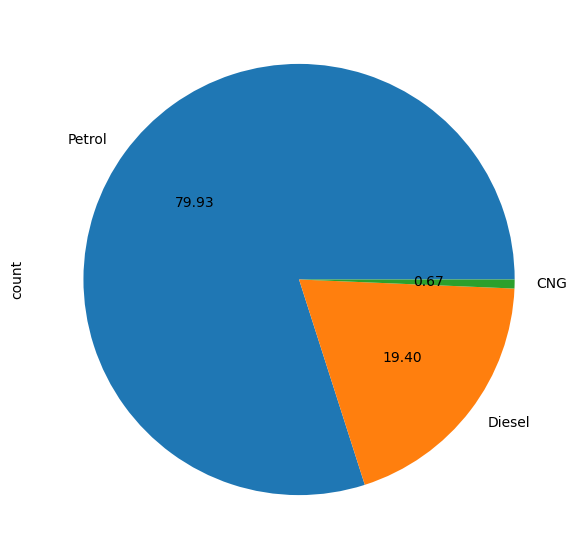

In [37]:
plt.figure(figsize=(7,7))
df['Fuel_Type'].value_counts().plot(kind = 'pie',autopct='%.2f')

In [38]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [39]:
df["Selling_type"].unique()

array(['Dealer', 'Individual'], dtype=object)

In [40]:
df["Transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [41]:
df['Owner'].nunique()

3

In [42]:
df_main = df.copy()
df_main.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [43]:
df.drop(['Car_Name'],axis = 'columns',inplace = True)
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [44]:
fuel_label = LabelEncoder()
selling_label = LabelEncoder()
transmission_label = LabelEncoder()

In [45]:
df['Fuel_Type'] = fuel_label.fit_transform(df['Fuel_Type'])
df['Selling_type'] = selling_label.fit_transform(df['Selling_type'])
df['Transmission'] = transmission_label.fit_transform(df['Transmission'])

In [46]:
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import KFold

In [48]:
X = df.drop('Selling_Price',axis = 'columns')
y = df['Selling_Price']

In [49]:
X.shape

(299, 7)

In [50]:
y.shape

(299,)

In [51]:
k=KFold(10)
for i,j in k.split(X,y):
    x_train,x_test=X.iloc[i],X.iloc[j]
    y_train,y_test=y.iloc[i],y.iloc[j]

In [52]:
x_test.shape

(29, 7)

In [53]:
models={'LinearRegression':LinearRegression(),
        'DecisionTreeRegressor':DecisionTreeRegressor(),
        'SVR':SVR(),
        'RandomForestRegressor':RandomForestRegressor(),
        'ExtraTreesRegressor':ExtraTreesRegressor(),
        'GradientBoostingRegressor':GradientBoostingRegressor()
}

In [54]:
report={}
for i in range(len(list(models.keys()))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc_score=r2_score(y_test,y_pred)*100
    mse=mean_squared_error(y_test,y_pred)*100
    mae=mean_absolute_error(y_test,y_pred)*100
    rmse=np.sqrt(mse)
    report[list(models.keys())[i]]={'model':list(models.values())[i],'accuracy_score':acc_score,'mean_square_error':mse,'mean_absolute_error':mae,'root_mean_square_error':rmse}

In [55]:
report

{'LinearRegression': {'model': LinearRegression(),
  'accuracy_score': 86.4807047234182,
  'mean_square_error': 89.54513746332773,
  'mean_absolute_error': 77.54267996862436,
  'root_mean_square_error': 9.462829252571757},
 'DecisionTreeRegressor': {'model': DecisionTreeRegressor(),
  'accuracy_score': 63.86709081093518,
  'mean_square_error': 239.32655172413794,
  'mean_absolute_error': 118.3793103448276,
  'root_mean_square_error': 15.47018266615291},
 'SVR': {'model': SVR(),
  'accuracy_score': -232.79586237278966,
  'mean_square_error': 2204.27549171282,
  'mean_absolute_error': 396.7101110316091,
  'root_mean_square_error': 46.94971237092747},
 'RandomForestRegressor': {'model': RandomForestRegressor(),
  'accuracy_score': 86.53213414810168,
  'mean_square_error': 89.20449434482748,
  'mean_absolute_error': 73.84827586206896,
  'root_mean_square_error': 9.44481309210656},
 'ExtraTreesRegressor': {'model': ExtraTreesRegressor(),
  'accuracy_score': 87.58078165632406,
  'mean_square

In [56]:
accuracy=0
for i in range(len(list(report))):
    if accuracy < list(report.values())[i]['accuracy_score']:
        accuracy=list(report.values())[i]['accuracy_score']
        final_model=list(report.values())[i]['model']

In [57]:
final_model.fit(x_train,y_train)

ExtraTreesRegressor()

In [58]:
y_pred = final_model.predict(x_test)

In [59]:
r2_score(y_test,y_pred)

0.8532785142484638

In [60]:
prediction=[]
for i in  y_pred:
    prediction.append(round(i,2))
prediction_data_frame=pd.DataFrame({'predicted':prediction,'original_value':y_test})
prediction_data_frame.reset_index(drop=True,inplace=True)

In [61]:
prediction_data_frame

,predicted,original_value
0,6.49,7.50
1,2.58,2.25
2,4.57,5.30
3,8.98,10.90
4,8.40,8.65
5,8.67,9.70
6,7.44,6.00
7,7.74,6.25
8,5.15,5.25
9,2.24,2.10


In [62]:
range(len(y_pred))

range(0, 29)

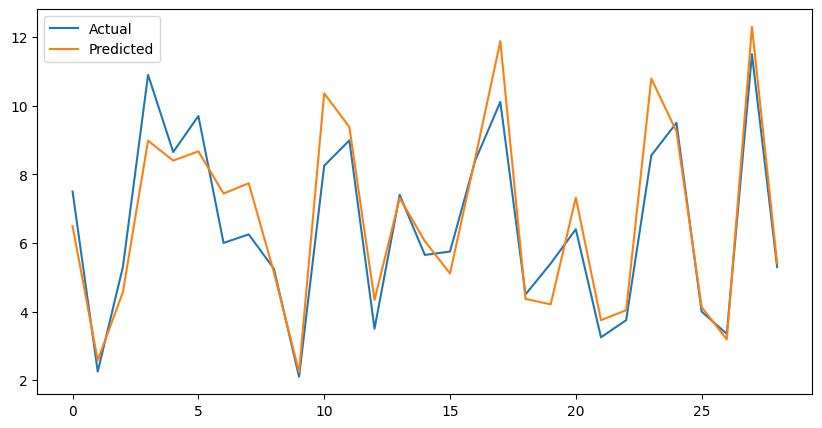

In [63]:
plt.figure(figsize=(10,5))
plt.plot(range(len(y_pred)),prediction_data_frame['original_value'])
plt.plot(range(len(y_pred)),prediction_data_frame['predicted'])
plt.legend(['Actual','Predicted'])
plt.show()

In [64]:
y_test

272     7.50
273     2.25
274     5.30
275    10.90
276     8.65
277     9.70
278     6.00
279     6.25
280     5.25
281     2.10
282     8.25
283     8.99
284     3.50
285     7.40
286     5.65
287     5.75
288     8.40
289    10.11
290     4.50
291     5.40
292     6.40
293     3.25
294     3.75
295     8.55
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, dtype: float64